<a href="https://colab.research.google.com/github/dralvima/IITmethods/blob/main/Allen_spike_trials_PyPhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TIME SERIES OF PHI** and related measures (e.g., number of mechanisms x arity)

First, let's install PyPhi for IIT4.0

In [ ]:
!pip install -U git+https://github.com/wmayner/pyphi.git@feature/iit-4.0
import itertools
import pyphi
# Disable PyPhi progress bars and welcome message
pyphi.config.PROGRESS_BARS = False
pyphi.config.WELCOME_OFF = True

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

  Cloning https://github.com/wmayner/pyphi.git (to revision feature/iit-4.0) to /tmp/pip-req-build-plh_ip1_
  Running command git clone --filter=blob:none --quiet https://github.com/wmayner/pyphi.git /tmp/pip-req-build-plh_ip1_
  Resolved https://github.com/wmayner/pyphi.git to commit f8572c75269be69d28fba3f48223f3a93654233e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.6/662.6 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━

**Next, let's access DANDI and grab data in NWB format**

In [ ]:
!pip install dandi

!pip install pynwb
from pynwb import NWBHDF5IO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.0/299.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.0/332.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.0/134.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.4/116.4 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setu

The data we are interested in is: https://dandiarchive.org/dandiset/000021?search=000021&pos=1

Allen Institute October 2019 Mouse extracellular electrophysiology data approximately matching two-photon brain observatory stimulus set.

https://portal.brain-map.org/explore/circuits/visual-coding-neuropixels


In [ ]:
!dandi download https://dandiarchive.org/dandiset/000021/draft/files?location=sub-699733573%2F

PATH                                                                  SIZE     DONE            DONE% CHECKSUM STATUS          MESSAGE
sub-699733573/sub-699733573_ses-715093703_probe-810755797_ecephys.nwb 2.1 GB   2.1 GB           100%    ok    done                   
sub-699733573/sub-699733573_ses-715093703_probe-810755799_ecephys.nwb 2.5 GB   2.5 GB           100%    ok    done                   
sub-699733573/sub-699733573_ses-715093703_probe-810755801_ecephys.nwb 2.2 GB   2.2 GB           100%    ok    done                   
sub-699733573/sub-699733573_ses-715093703_probe-810755803_ecephys.nwb 2.3 GB   2.3 GB           100%    ok    done                   
sub-699733573/sub-699733573_ses-715093703.nwb                         2.9 GB   2.9 GB           100%    ok    done                   
sub-699733573/sub-699733573_ses-715093703_probe-810755807_ecephys.nwb 1.3 GB   1.3 GB           100%    ok    done                   
sub-699733573/sub-699733573_ses-715093703_probe-810755805_ecep

In [ ]:
filepath = '/content/sub-699733573/sub-699733573_ses-715093703.nwb'
io = NWBHDF5IO(filepath, 'r',load_namespaces = True)  # open the file in read mode 'r'
nwb = io.read() # nwb dataset

/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


**Select trials (by stimulus)**

options are:

flashes_presentations

static_gratings_presentations

gabors_presentations

natural_scenes_presentations

drifting_gratings_presentations

natural_movie_one_presentations

natural_movie_three_presentations

spontaneous_presentations

In [ ]:
# grab all the flash presentation data
intervals_dict = nwb.intervals
print(intervals_dict)
stimulus_presentations = intervals_dict['drifting_gratings_presentations'].to_dataframe()
stim_on_times = stimulus_presentations.start_time[:].to_numpy()
N_trials = len(stim_on_times)

{'drifting_gratings_presentations': drifting_gratings_presentations pynwb.epoch.TimeIntervals at 0x138740092267168
Fields:
  colnames: ['start_time' 'stop_time' 'stimulus_name' 'stimulus_block'
 'temporal_frequency' 'color' 'mask' 'opacity' 'phase' 'size' 'units'
 'stimulus_index' 'orientation' 'spatial_frequency' 'contrast' 'tags'
 'timeseries']
  columns: (
    start_time <class 'hdmf.common.table.VectorData'>,
    stop_time <class 'hdmf.common.table.VectorData'>,
    stimulus_name <class 'hdmf.common.table.VectorData'>,
    stimulus_block <class 'hdmf.common.table.VectorData'>,
    temporal_frequency <class 'hdmf.common.table.VectorData'>,
    color <class 'hdmf.common.table.VectorData'>,
    mask <class 'hdmf.common.table.VectorData'>,
    opacity <class 'hdmf.common.table.VectorData'>,
    phase <class 'hdmf.common.table.VectorData'>,
    size <class 'hdmf.common.table.VectorData'>,
    units <class 'hdmf.common.table.VectorData'>,
    stimulus_index <class 'hdmf.common.table.Vect

# extract spiking data

In [ ]:
# make a dataframe of the units
units_df = nwb.units.to_dataframe()
units_df.columns

Index(['snr', 'quality', 'presence_ratio', 'spread', 'cumulative_drift',
       'isolation_distance', 'amplitude', 'firing_rate', 'nn_hit_rate',
       'isi_violations', 'velocity_below', 'l_ratio', 'nn_miss_rate',
       'waveform_halfwidth', 'repolarization_slope', 'amplitude_cutoff',
       'PT_ratio', 'silhouette_score', 'recovery_slope', 'waveform_duration',
       'local_index', 'max_drift', 'velocity_above', 'cluster_id',
       'peak_channel_id', 'd_prime', 'spike_times', 'spike_amplitudes',
       'waveform_mean'],
      dtype='object')

In [ ]:
# determine the brain areas that each electrode was recorded in
elLocationLabel = nwb.electrodes["location"].data[:]
import numpy as np
x = np.array(elLocationLabel)
locIdx_LGd = np.where(x == 'LGd')
locIdx_VISp = np.where(x == 'VISp')
locIdx_VISpm = np.where(x == 'VISpm')
locIdx_VISl = np.where(x == 'VISl')
locIdx_VISrl = np.where(x == 'VISrl')
# map the locations to specific probe IDs
elLocationID = nwb.electrodes["id"].data[:]
elID_LGd   = elLocationID[locIdx_LGd]
elID_VISp   = elLocationID[locIdx_VISp]
elID_VISpm   = elLocationID[locIdx_VISpm]
elID_VISl   = elLocationID[locIdx_VISl]
elID_VISrl   = elLocationID[locIdx_VISrl]

# Find 'good' units
y = np.array(units_df.quality)
goodUnit = np.where(y == 'good')[0]
cids = units_df.peak_channel_id.to_list()
unitsToUse_idx_LGd = [a for a in goodUnit if cids[a] in elID_LGd]
unitsToUse_idx_VISp = [a for a in goodUnit if cids[a] in elID_VISp]
unitsToUse_idx_VISpm = [a for a in goodUnit if cids[a] in elID_VISpm]
unitsToUse_idx_VISl = [a for a in goodUnit if cids[a] in elID_VISl]
unitsToUse_idx_VISrl = [a for a in goodUnit if cids[a] in elID_VISrl]
# collect good units per area
unitsToUse_LGd = nwb.units[unitsToUse_idx_LGd]
unitsToUse_VISp = nwb.units[unitsToUse_idx_VISp]
unitsToUse_VISpm = nwb.units[unitsToUse_idx_VISpm]
unitsToUse_VISl = nwb.units[unitsToUse_idx_VISl]
unitsToUse_VISrl = nwb.units[unitsToUse_idx_VISrl]

**TRIAL-AVERAGE to get stimulus-locked RESPONSES**

In [ ]:
# define time window pre and post stimulus onset
pre = 0.5
post = 2
dt = 10. / 1000 # 10 ms bins
T_trial = int((pre + post) / dt) # number of time bins in a trial
bin_edges = -pre + np.arange(T_trial+1) * dt

*compute V1 response*

In [ ]:
unitsToUse = unitsToUse_VISp

# Construct trials for
N_neurons = len(unitsToUse) # for V1/VISp there are 135 'good' units
ys = []
for time in stim_on_times:
  y_trial = np.zeros((T_trial, N_neurons))
  for unit in range(N_neurons):
    unit_spike_times = unitsToUse['spike_times'].iloc[unit]
    # compute spike times relative to stimulus onset
    aligned_spikes = unit_spike_times - time
    # keep only spike times in a given time window around the stimulus onset
    aligned_spikes = aligned_spikes[(-pre < aligned_spikes) & (aligned_spikes < post)]
    # bin spikes
    y_trial[:,unit] = np.histogram(aligned_spikes, bins=bin_edges)[0]
  ys.append(y_trial.astype(int))

**PLOT**

*example neuron*

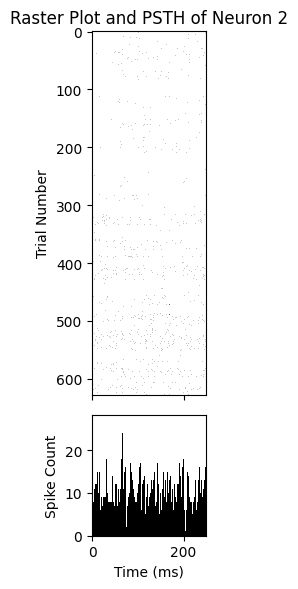

In [ ]:
# We now have all the spikes in ys (135 neurons x 628 trials x 250ms)

# Let's choose a neuron, for example, the first neuron again
neuron_index = 1  # selecting the first neuron
neuron_data = [trial[:, neuron_index] for trial in ys]

# Converting the list of arrays into a single 2D array for plotting
neuron_data_array = np.array(neuron_data)

# Computing the PSTH
psth = np.sum(neuron_data_array, axis=0)


# Creating a combined plot with the raster plot and the PSTH
fig, (ax_raster, ax_psth) = plt.subplots(2, 1, figsize=(2, 6), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# Raster plot
ax_raster.imshow(neuron_data_array, cmap='Greys', aspect='auto', interpolation='none')
ax_raster.set_ylabel('Trial Number')
ax_raster.set_title(f'Raster Plot and PSTH of Neuron {neuron_index + 1}')

# PSTH plot
ax_psth.bar(range(250), psth, width=1.0, color='black')
ax_psth.set_ylabel('Spike Count')
ax_psth.set_xlabel('Time (ms)')

plt.tight_layout()
plt.show()

*all neurons*

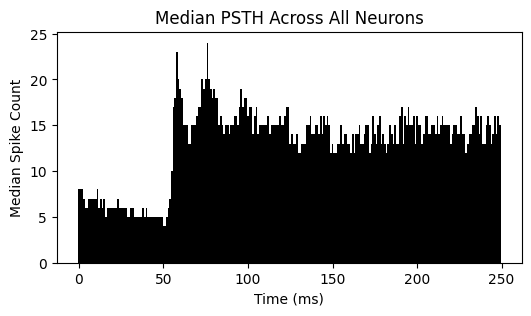

In [ ]:
# Computing the PSTH for each neuron and then taking the median across all neurons

# Initializing an empty list to store PSTH for each neuron
psth_all_neurons = []

# Looping through each neuron to compute its PSTH
for i in range(135):  # Assuming there are 135 neurons
    neuron_data = [trial[:, i] for trial in ys]
    neuron_data_array = np.array(neuron_data)
    psth_neuron = np.sum(neuron_data_array, axis=0)
    psth_all_neurons.append(psth_neuron)

# Converting the list of PSTHs into an array and computing the median PSTH
psth_all_neurons_array = np.array(psth_all_neurons)
median_psth = np.median(psth_all_neurons_array, axis=0)

# Plotting the median PSTH
plt.figure(figsize=(6, 3))
plt.bar(range(250), median_psth, width=1.0, color='black')
plt.title('Median PSTH Across All Neurons')
plt.xlabel('Time (ms)')
plt.ylabel('Median Spike Count')
plt.show()

Let's grab three neurons that respond well and are quite active overall

**LET's CREATE TPMS!!!**

In [ ]:
# Step 1: Create matrices for each trial

# Selecting the data for the three chosen neurons
neuron_indices = [11, 22, 57]
trial_matrices = []

for trial in ys:
    trial_matrix = np.array([trial[:, neuron_indices[0]],
                             trial[:, neuron_indices[1]],
                             trial[:, neuron_indices[2]]])
    trial_matrices.append(trial_matrix)


*Just out of curiosity, let's try with and without NaNs*

In [ ]:
def compute_tpm(trial_matrix):
    """
    Compute the Transition Probability Matrix (TPM) for a given trial.
    The TPM is an 8x8 matrix for the 8 possible states of 3 neurons.
    """
    # Define all possible states for 3 neurons
    states = [(i, j, k) for i in range(2) for j in range(2) for k in range(2)]

    # Initialize the TPM with zeros
    tpm = np.zeros((8, 8))

    # Count transitions between states
    for t in range(trial_matrix.shape[1] - 1):
        current_state = tuple(trial_matrix[:, t])
        next_state = tuple(trial_matrix[:, t + 1])

        if current_state in states and next_state in states:
            current_index = states.index(current_state)
            next_index = states.index(next_state)
            tpm[current_index, next_index] += 1

    # Normalize the TPM by row to get probabilities
    row_sums = tpm.sum(axis=1, keepdims=True)
    tpm_normalized = np.divide(tpm, row_sums, out=np.zeros_like(tpm), where=row_sums!=0)

    return tpm_normalized

# Computing the TPM for each trial
tpms = [compute_tpm(matrix) for matrix in trial_matrices]

*Keep track of how much trial-averaging improves our TPM:*

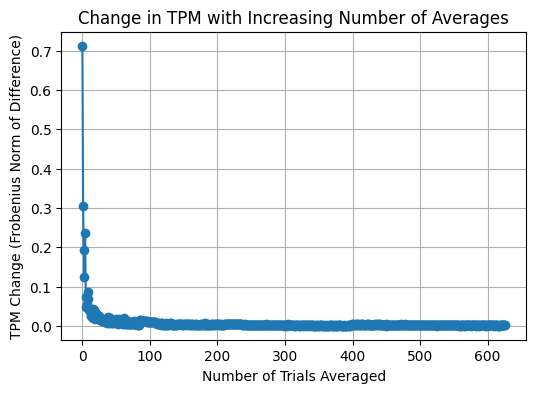

In [ ]:
def average_tpms(tpms, skip_nans=False):
    """
    Compute the average TPM from a list of TPMs.
    If skip_nans is True, TPMs containing NaNs are skipped.
    Otherwise, nanmean is used for averaging.
    """
    if skip_nans:
        # Filter out TPMs with NaNs
        tpms_filtered = [tpm for tpm in tpms if not np.isnan(tpm).any()]
        average_tpm = np.mean(tpms_filtered, axis=0)
    else:
        # Use nanmean to ignore NaNs in the averaging process
        average_tpm = np.nanmean(tpms, axis=0)

    return average_tpm

# Computing the two types of average TPMs
average_tpm_excluding_nans = average_tpms(tpms, skip_nans=True)
average_tpm_nanmean = average_tpms(tpms, skip_nans=False)

# Function to calculate the similarity between two TPMs
def tpm_similarity(tpm1, tpm2):
    """
    Calculate a similarity measure between two TPMs.
    Here, we'll use the Frobenius norm of the difference between the two TPMs.
    """
    return np.linalg.norm(tpm1 - tpm2, 'fro')

# Calculating how the TPM changes with the increasing number of averages
similarity_scores = []
current_average = tpms[0]

for i in range(1, len(tpms)):
    next_average = average_tpms(tpms[:i+1], skip_nans=False)
    similarity_score = tpm_similarity(current_average, next_average)
    similarity_scores.append(similarity_score)
    current_average = next_average

# Plotting the similarity scores
plt.figure(figsize=(6, 4))
plt.plot(similarity_scores, marker='o', linestyle='-')
plt.title('Change in TPM with Increasing Number of Averages')
plt.xlabel('Number of Trials Averaged')
plt.ylabel('TPM Change (Frobenius Norm of Difference)')
plt.grid(True)
plt.show()

What is the better strategy of dealing with NaNs?

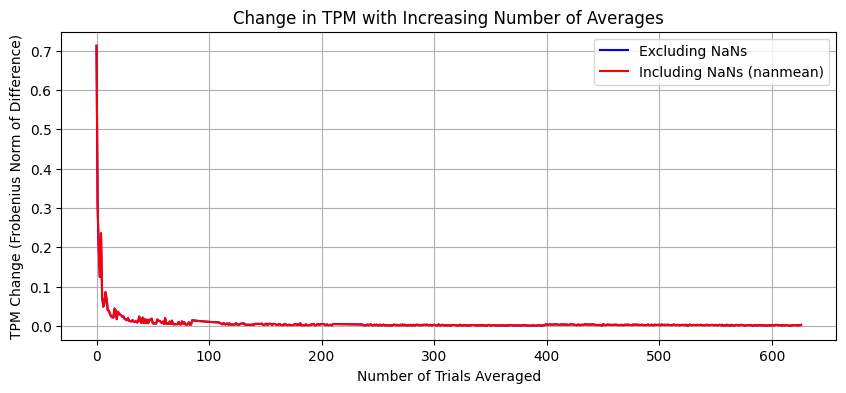

In [ ]:
# Function to compute the average TPM with the option to skip or include NaNs
def compute_averaged_tpms(tpms, skip_nans=False):
    """
    Compute a list of averaged TPMs, adding one trial at a time.
    If skip_nans is True, TPMs containing NaNs are skipped in the average.
    Otherwise, nanmean is used for averaging.
    """
    averaged_tpms = []
    for i in range(1, len(tpms) + 1):
        averaged_tpm = average_tpms(tpms[:i], skip_nans=skip_nans)
        averaged_tpms.append(averaged_tpm)
    return averaged_tpms

# Compute the averaged TPMs for both methods
averaged_tpms_excluding_nans = compute_averaged_tpms(tpms, skip_nans=True)
averaged_tpms_including_nans = compute_averaged_tpms(tpms, skip_nans=False)

# Function to calculate the change in TPMs across averages
def calculate_tpm_changes(averaged_tpms):
    """
    Calculate the change in TPMs as more trials are averaged.
    """
    changes = []
    for i in range(1, len(averaged_tpms)):
        change = tpm_similarity(averaged_tpms[i-1], averaged_tpms[i])
        changes.append(change)
    return changes

# Calculate the changes for both sets of averaged TPMs
changes_excluding_nans = calculate_tpm_changes(averaged_tpms_excluding_nans)
changes_including_nans = calculate_tpm_changes(averaged_tpms_including_nans)

# Plotting the changes for both methods
plt.figure(figsize=(10, 4))
plt.plot(changes_excluding_nans, marker='', linestyle='-', color='blue', label='Excluding NaNs')
plt.plot(changes_including_nans, marker='', linestyle='-', color='red', label='Including NaNs (nanmean)')
plt.title('Change in TPM with Increasing Number of Averages')
plt.xlabel('Number of Trials Averaged')
plt.ylabel('TPM Change (Frobenius Norm of Difference)')
plt.legend()
plt.grid(True)
plt.show()

Next, let's compare this TPM with a TPM where we just average spiking across all trials

In [ ]:
import numpy as np

# Function to compute the Transition Probability Matrix (TPM) for a given trial
def compute_tpm(trial_matrix):
    # Define all possible states for 3 neurons
    states = [(i, j, k) for i in range(2) for j in range(2) for k in range(2)]

    # Initialize the TPM with zeros
    tpm = np.zeros((8, 8))

    # Count transitions between states
    for t in range(trial_matrix.shape[1] - 1):
        current_state = tuple(trial_matrix[:, t])
        next_state = tuple(trial_matrix[:, t + 1])

        if current_state in states and next_state in states:
            current_index = states.index(current_state)
            next_index = states.index(next_state)
            tpm[current_index, next_index] += 1

    # Normalize the TPM by row to get probabilities
    row_sums = tpm.sum(axis=1, keepdims=True)
    tpm_normalized = np.divide(tpm, row_sums, out=np.zeros_like(tpm), where=row_sums!=0)

    return tpm_normalized

# Initializing an array to store the trial-averages (3 neurons, 250 time points)
trial_averages = np.zeros((3, 250))

# Assuming 'ys' is the list of all trial data matrices
for neuron_index in range(3):
    neuron_id = neuron_indices[neuron_index]
    for trial in ys:
        trial_averages[neuron_index] += trial[:, neuron_id]

# Converting sums to binary (0 or 1) based on the average
trial_averages_binary = (trial_averages / len(ys)) >= 0.5

# Computing the TPM for the trial-average matrix
tpm_trial_average = compute_tpm(trial_averages_binary)

plot that

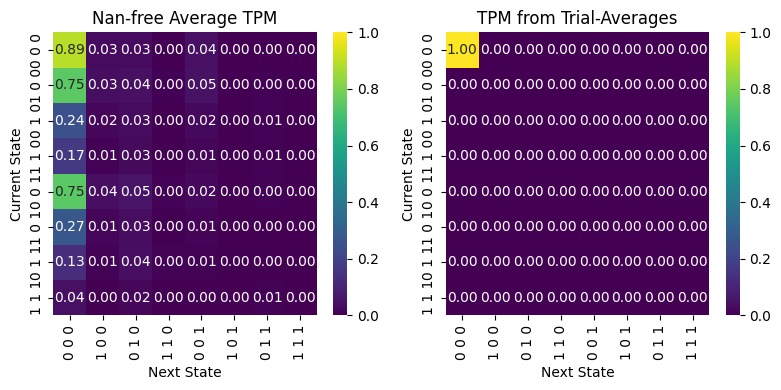

In [ ]:
import seaborn as sns

# Reordering the states as per the specified order
specified_order = [(0, 0, 0), (1, 0, 0), (0, 1, 0), (1, 1, 0), (0, 0, 1), (1, 0, 1), (0, 1, 1), (1, 1, 1)]
state_labels_ordered = [' '.join(map(str, state)) for state in specified_order]

# Function to reorder TPM according to the specified order
def reorder_tpm(tpm, order):
    # Mapping the current order to the specified order
    current_order = [(i, j, k) for i in range(2) for j in range(2) for k in range(2)]
    mapping = [current_order.index(state) for state in order]
    # Reordering the TPM
    reordered_tpm = tpm[np.ix_(mapping, mapping)]
    return reordered_tpm

# Reordering the TPMs
reordered_average_tpm = reorder_tpm(average_tpm_excluding_nans, specified_order)
reordered_trial_average_tpm = reorder_tpm(tpm_trial_average, specified_order)

# Plotting the reordered TPMs with the same scaling
vmin = min(reordered_average_tpm.min(), reordered_trial_average_tpm.min())
vmax = max(reordered_average_tpm.max(), reordered_trial_average_tpm.max())

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Nan-free average TPM with reordered state labels
sns.heatmap(reordered_average_tpm, ax=axs[0], cmap='viridis', annot=True, fmt='.2f', xticklabels=state_labels_ordered, yticklabels=state_labels_ordered, vmin=vmin, vmax=vmax)
axs[0].set_title('Nan-free Average TPM')
axs[0].set_xlabel('Next State')
axs[0].set_ylabel('Current State')

# TPM from trial-averages with reordered state labels
sns.heatmap(reordered_trial_average_tpm, ax=axs[1], cmap='viridis', annot=True, fmt='.2f', xticklabels=state_labels_ordered, yticklabels=state_labels_ordered, vmin=vmin, vmax=vmax)
axs[1].set_title('TPM from Trial-Averages')
axs[1].set_xlabel('Next State')
axs[1].set_ylabel('Current State')

plt.tight_layout()
plt.show()

Well, it is clear from that that binary spikes are a dead end. The prevailing state is (0 0 0).

How about SDF instead?

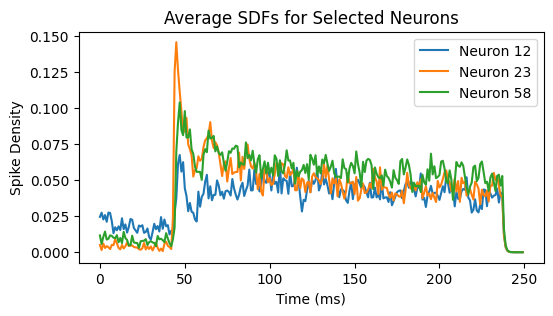

In [ ]:
import scipy.signal

# Define an EPSP-shaped kernel
def create_epsp_kernel(peak_time=1, decay_time=5, total_duration=25, sampling_rate=1):
    """
    Create an EPSP-shaped kernel with specified peak time, decay time, total duration, and sampling rate.
    The kernel will have a rapid rise to a peak and an exponential decay.
    """
    time = np.arange(0, total_duration, sampling_rate)
    rise = np.exp(-time / peak_time)  # Rise part of the EPSP
    decay = np.exp(-time / decay_time)  # Decay part of the EPSP
    epsp_kernel = rise * decay
    epsp_kernel /= np.sum(epsp_kernel)  # Normalize the kernel
    return epsp_kernel

# Create the EPSP kernel
epsp_kernel = create_epsp_kernel()

# Function to convert a spike train to an SDF using the EPSP kernel
def spike_train_to_sdf(spike_train, kernel):
    """
    Convert a spike train to a spike density function (SDF) using a specified kernel.
    """
    return scipy.signal.convolve(spike_train, kernel, mode='same')

# Compute the SDFs for each trial for each of the three neurons and average them
average_sdfs = np.zeros((3, 250))  # 3 neurons, 250 time points
for neuron_index in range(3):
    neuron_id = neuron_indices[neuron_index]
    sdfs = []
    for trial in ys:
        sdf = spike_train_to_sdf(trial[:, neuron_id], epsp_kernel)
        sdfs.append(sdf)
    average_sdfs[neuron_index] = np.mean(sdfs, axis=0)

# Plotting the average SDFs of all three neurons
plt.figure(figsize=(6, 3))
for i in range(3):
    plt.plot(average_sdfs[i], label=f'Neuron {neuron_indices[i] + 1}')
plt.title('Average SDFs for Selected Neurons')
plt.xlabel('Time (ms)')
plt.ylabel('Spike Density')
plt.legend()
plt.show()

The question is to how to binarize the SDFs to get MORE but not TOO MANY up-states?

Let's try simple median first

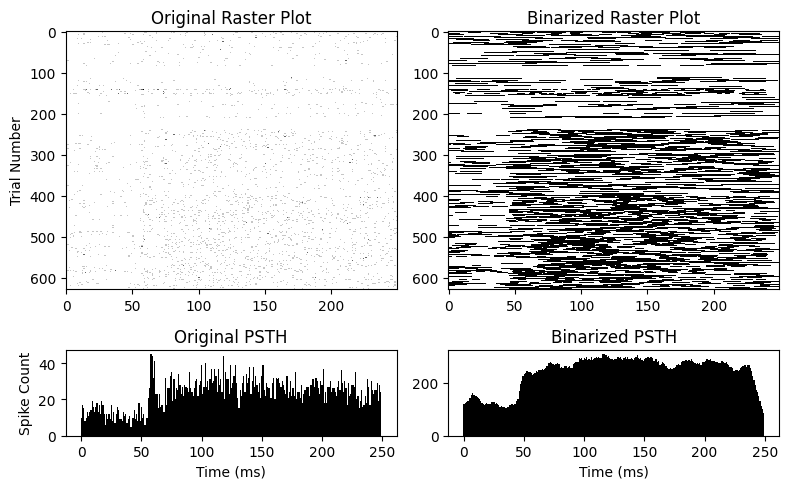

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

# Define an EPSP-shaped kernel
def create_epsp_kernel(peak_time=1, decay_time=5, total_duration=25, sampling_rate=1):
    """
    Create an EPSP-shaped kernel with specified peak time, decay time, total duration, and sampling rate.
    """
    time = np.arange(0, total_duration, sampling_rate)
    rise = np.exp(-time / peak_time)
    decay = np.exp(-time / decay_time)
    epsp_kernel = rise * decay
    epsp_kernel /= np.sum(epsp_kernel)
    return epsp_kernel

# Create the EPSP kernel
epsp_kernel = create_epsp_kernel()

# Function to convert a spike train to an SDF using the EPSP kernel
def spike_train_to_sdf(spike_train, kernel):
    """
    Convert a spike train to a spike density function (SDF) using a specified kernel.
    """
    return scipy.signal.convolve(spike_train, kernel, mode='same')

# Assuming neuron_indices are the indices of the neurons to be analyzed
neuron_indices = [11, 22, 57]  # Replace with your specific neuron indices

# Binarize each neuron's SDF for each trial based on the median value of that trial
binarized_sdfs = []

for neuron_index, neuron_id in enumerate(neuron_indices):
    neuron_sdfs = []
    for trial in ys:  # Replace ys_new with ys
        sdf = spike_train_to_sdf(trial[:, neuron_id], epsp_kernel)
        median_value = np.median(sdf)
        binarized_sdf = np.where(sdf > median_value, 1, 0)
        neuron_sdfs.append(binarized_sdf)
    binarized_sdfs.append(neuron_sdfs)

# Selecting the first neuron for plotting
selected_neuron_original_2d = np.array([trial[:, neuron_indices[0]] for trial in ys])
psth_original_corrected = np.sum(selected_neuron_original_2d, axis=0)

selected_neuron_binarized = binarized_sdfs[0]
psth_binarized = np.sum(np.array(selected_neuron_binarized), axis=0)

# Creating combined plots for original and binarized data
fig, axs = plt.subplots(2, 2, figsize=(8, 5), gridspec_kw={'height_ratios': [3, 1]})

# Original data raster plot
axs[0, 0].imshow(selected_neuron_original_2d, cmap='Greys', aspect='auto', interpolation='none')
axs[0, 0].set_title('Original Raster Plot')
axs[0, 0].set_ylabel('Trial Number')

# Original data PSTH
axs[1, 0].bar(range(250), psth_original_corrected, width=1.0, color='black')
axs[1, 0].set_title('Original PSTH')
axs[1, 0].set_xlabel('Time (ms)')
axs[1, 0].set_ylabel('Spike Count')

# Binarized data raster plot
axs[0, 1].imshow(np.array(selected_neuron_binarized), cmap='Greys', aspect='auto', interpolation='none')
axs[0, 1].set_title('Binarized Raster Plot')

# Binarized data PSTH
axs[1, 1].bar(range(250), psth_binarized, width=1.0, color='black')
axs[1, 1].set_title('Binarized PSTH')
axs[1, 1].set_xlabel('Time (ms)')

plt.tight_layout()
plt.show()

The benefit of using the median and not, say, a 90% percentile (or 2xSTD) instead is that the data will be balanced.

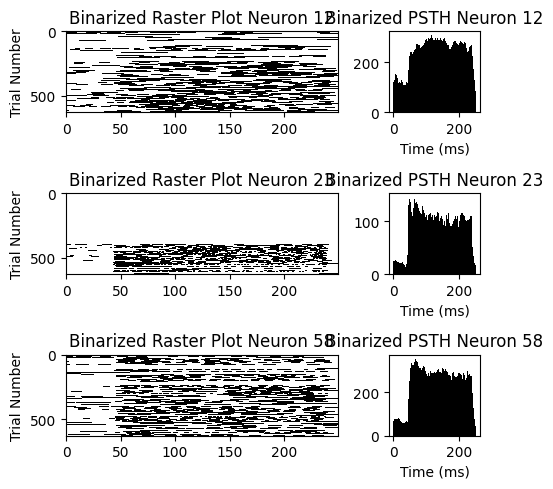

In [ ]:
# Creating plots for the binarized data (using EPSP kernel) for all three neurons

# Setting up the figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(5, 5), gridspec_kw={'height_ratios': [3, 3, 3], 'width_ratios': [3, 1]})

# Plotting for each of the three neurons
for i, neuron_id in enumerate(neuron_indices):
    # Binarized raster plot for each neuron
    axs[i, 0].imshow(np.array(binarized_sdfs[i]), cmap='Greys', aspect='auto', interpolation='none')
    axs[i, 0].set_title(f'Binarized Raster Plot Neuron {neuron_id + 1}')
    axs[i, 0].set_ylabel('Trial Number')

    # Binarized PSTH for each neuron
    psth_binarized_neuron = np.sum(np.array(binarized_sdfs[i]), axis=0)
    axs[i, 1].bar(range(250), psth_binarized_neuron, width=1.0, color='black')
    axs[i, 1].set_title(f'Binarized PSTH Neuron {neuron_id + 1}')
    axs[i, 1].set_xlabel('Time (ms)')

plt.tight_layout()
plt.show()

Let's now take care of the issue of neuron 23 only showing up for a subset of trials/

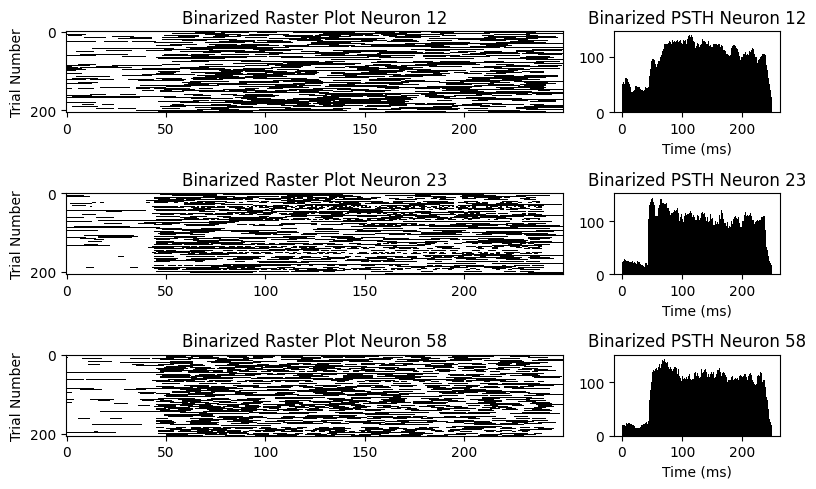

In [ ]:
# Selecting the same trials for the other two neurons as the active trials of the middle neuron

# Creating new binarized SDFs for all three neurons using the active trials of the middle neuron
binarized_sdfs_active_trials = []

# Identifying the trials where the middle neuron (neuron at index 22) shows activity
active_trials_middle_neuron = [np.any(trial[:, 22]) for trial in ys]

for neuron_index, neuron_id in enumerate(neuron_indices):
    neuron_sdfs_active_trials = []
    for i, is_active in enumerate(active_trials_middle_neuron):
        if is_active:  # Include trial only if it's active for the middle neuron
            trial = ys[i]
            sdf = spike_train_to_sdf(trial[:, neuron_id], epsp_kernel)
            median_value = np.median(sdf)
            binarized_sdf = np.where(sdf > median_value, 1, 0)
            neuron_sdfs_active_trials.append(binarized_sdf)
    binarized_sdfs_active_trials.append(neuron_sdfs_active_trials)

# Replotting the raster plots and PSTHs for the newly binarized data using active trials of the middle neuron
fig, axs = plt.subplots(3, 2, figsize=(8, 5), gridspec_kw={'height_ratios': [3, 3, 3], 'width_ratios': [3, 1]})

for i, neuron_id in enumerate(neuron_indices):
    # Binarized raster plot for each neuron
    axs[i, 0].imshow(np.array(binarized_sdfs_active_trials[i]), cmap='Greys', aspect='auto', interpolation='none')
    axs[i, 0].set_title(f'Binarized Raster Plot Neuron {neuron_id + 1}')
    axs[i, 0].set_ylabel('Trial Number')

    # Binarized PSTH for each neuron
    psth_binarized_neuron = np.sum(np.array(binarized_sdfs_active_trials[i]), axis=0)
    axs[i, 1].bar(range(len(psth_binarized_neuron)), psth_binarized_neuron, width=1.0, color='black')
    axs[i, 1].set_title(f'Binarized PSTH Neuron {neuron_id + 1}')
    axs[i, 1].set_xlabel('Time (ms)')

plt.tight_layout()
plt.show()

Compute trial-average TPM for these data

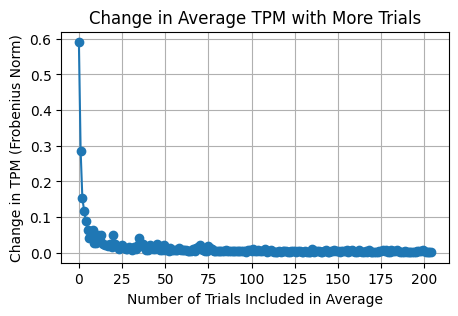

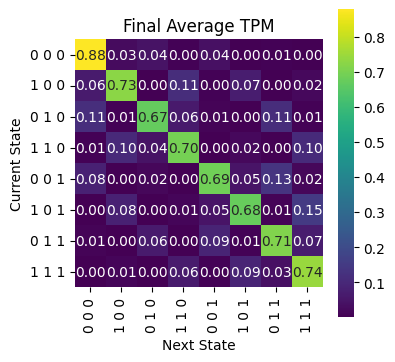

In [ ]:
# Computing the trial-by-trial TPM for the binarized data of the three neurons

def compute_tpm(trial_matrix):
    """
    Compute the Transition Probability Matrix (TPM) for a given trial.
    The TPM is an 8x8 matrix for the 8 possible states of 3 neurons.
    """
    # Define all possible states for 3 neurons
    states = [(i, j, k) for i in range(2) for j in range(2) for k in range(2)]

    # Initialize the TPM with zeros
    tpm = np.zeros((8, 8))

    # Count transitions between states
    valid_transitions = 0
    for t in range(trial_matrix.shape[1] - 1):
        current_state = tuple(trial_matrix[:, t])
        next_state = tuple(trial_matrix[:, t + 1])

        if current_state in states and next_state in states:
            current_index = states.index(current_state)
            next_index = states.index(next_state)
            tpm[current_index, next_index] += 1
            valid_transitions += 1

    # Normalize the TPM by row to get probabilities, if there are valid transitions
    if valid_transitions > 0:
        row_sums = tpm.sum(axis=1, keepdims=True)
        tpm_normalized = np.divide(tpm, row_sums, out=np.zeros_like(tpm), where=row_sums!=0)
    else:
        tpm_normalized = np.full((8, 8), np.nan)  # If no valid transitions, fill with NaN

    return tpm_normalized

# Creating trial matrices and computing TPMs for each trial
trial_matrices = []
tpms = []

for trial in range(len(binarized_sdfs_active_trials[0])):
    trial_matrix = np.array([binarized_sdfs_active_trials[0][trial],
                             binarized_sdfs_active_trials[1][trial],
                             binarized_sdfs_active_trials[2][trial]])
    trial_matrices.append(trial_matrix)
    tpms.append(compute_tpm(trial_matrix))

# Averaging TPMs across trials, skipping NaNs
average_tpms = []
current_average = np.zeros((8, 8))

for i in range(len(tpms)):
    tpm_subset = [tpm for tpm in tpms[:i+1] if not np.isnan(tpm).any()]
    if tpm_subset:  # Only average if the subset is not empty
        average_tpms.append(np.nanmean(tpm_subset, axis=0))
        current_average = average_tpms[-1]

# Calculating the change in the average TPM as more trials are added
tpm_changes = []
for i in range(1, len(average_tpms)):
    tpm_change = np.linalg.norm(average_tpms[i] - average_tpms[i-1], 'fro')
    tpm_changes.append(tpm_change)

# Plotting the change in the average TPM over trials
plt.figure(figsize=(5, 3))
plt.plot(tpm_changes, marker='o', linestyle='-')
plt.title('Change in Average TPM with More Trials')
plt.xlabel('Number of Trials Included in Average')
plt.ylabel('Change in TPM (Frobenius Norm)')
plt.grid(True)
plt.show()

# Reordering the TPMs as per the specified order and updating the 2D plot labels
specified_order = [(0, 0, 0), (1, 0, 0), (0, 1, 0), (1, 1, 0), (0, 0, 1), (1, 0, 1), (0, 1, 1), (1, 1, 1)]
state_labels_ordered = [' '.join(map(str, state)) for state in specified_order]

# Function to reorder TPM according to the specified order
def reorder_tpm(tpm, order):
    # Mapping the current order to the specified order
    current_order = [(i, j, k) for i in range(2) for j in range(2) for k in range(2)]
    mapping = [current_order.index(state) for state in order]
    # Reordering the TPM
    reordered_tpm = tpm[np.ix_(mapping, mapping)]
    return reordered_tpm

# Reordering the final average TPM
reordered_average_tpm = reorder_tpm(current_average, specified_order)

# Plotting the reordered final average TPM as a 2D color plot
plt.figure(figsize=(4, 4))
sns.heatmap(reordered_average_tpm, annot=True, fmt=".2f", cmap='viridis', cbar=True, square=True, xticklabels=state_labels_ordered, yticklabels=state_labels_ordered)
plt.title('Final Average TPM')
plt.xlabel('Next State')
plt.ylabel('Current State')
plt.show()

Note: This TPM *does not work for IIT* since probabilities will not add to 1]

Let's also do a trial-shuffle control

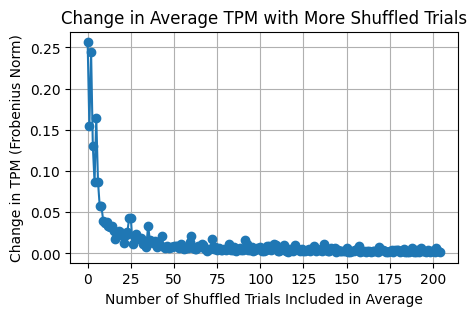

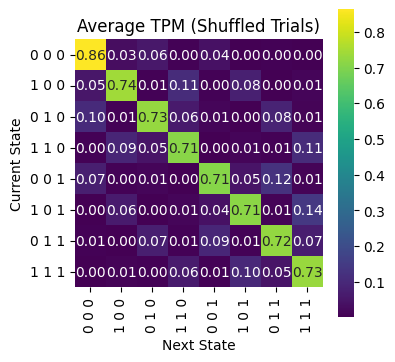

In [ ]:
# Randomly shuffling the trials for each neuron before computing the TPMs

# Setting a random seed for reproducibility
np.random.seed(0)

# Shuffling the trials for each neuron separately
shuffled_binarized_sdfs = []
for neuron_sdfs in binarized_sdfs_active_trials:
    shuffled_trials = np.random.permutation(neuron_sdfs)
    shuffled_binarized_sdfs.append(shuffled_trials)

# Computing TPMs for the shuffled trials
shuffled_tpms = []
for trial in range(len(shuffled_binarized_sdfs[0])):
    shuffled_trial_matrix = np.array([shuffled_binarized_sdfs[0][trial],
                                      shuffled_binarized_sdfs[1][trial],
                                      shuffled_binarized_sdfs[2][trial]])
    shuffled_tpms.append(compute_tpm(shuffled_trial_matrix))

# Averaging TPMs across shuffled trials, skipping NaNs
average_shuffled_tpms = []
current_shuffled_average = np.zeros((8, 8))

for i in range(len(shuffled_tpms)):
    tpm_subset = [tpm for tpm in shuffled_tpms[:i+1] if not np.isnan(tpm).any()]
    if tpm_subset:  # Only average if the subset is not empty
        average_shuffled_tpms.append(np.nanmean(tpm_subset, axis=0))
        current_shuffled_average = average_shuffled_tpms[-1]

# Calculating the change in the average TPM as more shuffled trials are added
tpm_shuffled_changes = []
for i in range(1, len(average_shuffled_tpms)):
    tpm_change = np.linalg.norm(average_shuffled_tpms[i] - average_shuffled_tpms[i-1], 'fro')
    tpm_shuffled_changes.append(tpm_change)

# Plotting the change in the average TPM over shuffled trials
plt.figure(figsize=(5, 3))
plt.plot(tpm_shuffled_changes, marker='o', linestyle='-')
plt.title('Change in Average TPM with More Shuffled Trials')
plt.xlabel('Number of Shuffled Trials Included in Average')
plt.ylabel('Change in TPM (Frobenius Norm)')
plt.grid(True)
plt.show()

# Reordering the final average TPM for the shuffled trials
reordered_average_shuffled_tpm = reorder_tpm(current_shuffled_average, specified_order)

# Plotting the reordered final average TPM for the shuffled trials
plt.figure(figsize=(4, 4))
sns.heatmap(reordered_average_shuffled_tpm, annot=True, fmt=".2f", cmap='viridis', cbar=True, square=True, xticklabels=state_labels_ordered, yticklabels=state_labels_ordered)
plt.title('Average TPM (Shuffled Trials)')
plt.xlabel('Next State')
plt.ylabel('Current State')
plt.show()

Can we create an average binary state for these three neurons across these trials?

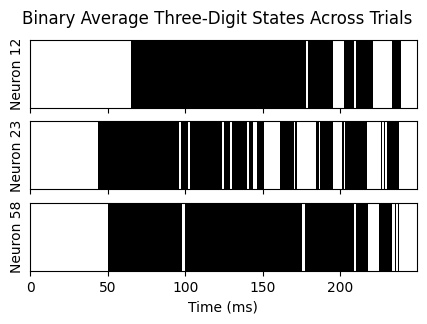

In [ ]:
# Computing the three-digit state as a function of time for each trial and averaging them

# Function to compute the three-digit state for each trial
def compute_three_digit_state(trial_sdfs):
    return np.array([trial_sdfs[0], trial_sdfs[1], trial_sdfs[2]])

# Initialize an array to store the sum of three-digit states across all trials
sum_three_digit_states = np.zeros((3, 250))  # 3 neurons, 250 time points

# Summing the three-digit states across all trials
num_trials = len(binarized_sdfs_active_trials[0])
for trial in range(num_trials):
    trial_state = compute_three_digit_state([binarized_sdfs_active_trials[i][trial] for i in range(3)])
    sum_three_digit_states += trial_state

# Averaging the three-digit states
average_three_digit_states = sum_three_digit_states / num_trials

# Binarizing the average three-digit states: a time point is set to 1 if the average is greater than or equal to 0.5, otherwise 0
binary_average_three_digit_states = (average_three_digit_states >= 0.5).astype(int)

# Plotting the binary average three-digit states in a raster-like format
fig, axs = plt.subplots(3, 1, figsize=(5, 3), sharex=True)

for i in range(3):
    axs[i].imshow([binary_average_three_digit_states[i]], cmap='Greys', aspect='auto', interpolation='none')
    axs[i].set_ylabel(f'Neuron {neuron_indices[i] + 1}')
    axs[i].set_yticks([])
    axs[i].set_yticklabels([])

plt.xlabel('Time (ms)')
plt.suptitle('Binary Average Three-Digit States Across Trials')
plt.show()

state diagram [not that this would look identical for the shuffled data since order of trials (synchronizity) does not matter here]

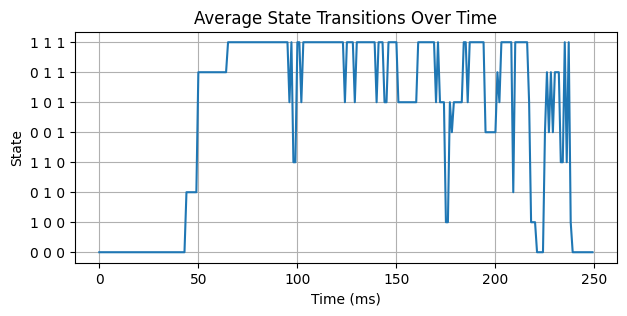

In [ ]:
# Creating a state diagram plot where each state is assigned a number

# Defining the order of the states and their assigned numbers
state_order = [(0, 0, 0), (1, 0, 0), (0, 1, 0), (1, 1, 0), (0, 0, 1), (1, 0, 1), (0, 1, 1), (1, 1, 1)]
state_numbers = {state: i for i, state in enumerate(state_order)}

# Converting the binary average three-digit states to their assigned numbers
state_number_time_series = np.array([state_numbers[tuple(state)] for state in binary_average_three_digit_states.T])

# Plotting the state number time series
plt.figure(figsize=(7, 3))
plt.plot(range(250), state_number_time_series, label='State Number')

# Customizing the y-axis to show binary states instead of numbers
plt.yticks(range(len(state_order)), [' '.join(map(str, state)) for state in state_order])

plt.xlabel('Time (ms)')
plt.ylabel('State')
plt.title('Average State Transitions Over Time')
plt.grid(True)
plt.show()

Let's try **appending trials for the MEGA-TPM.**

First, let's compute the TPM for the first trial as a sanity check.

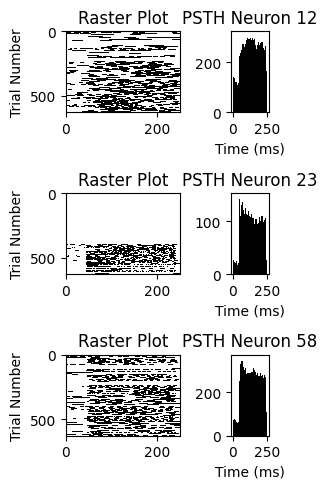

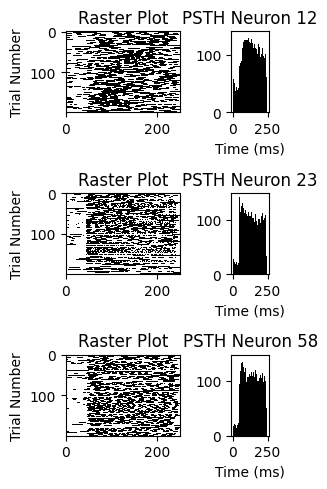

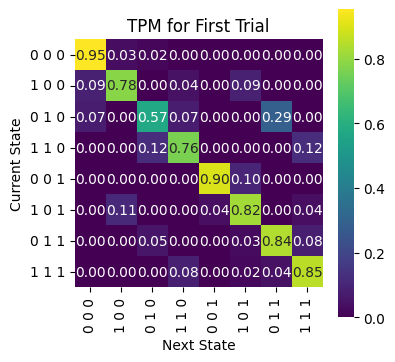

In [ ]:
# Binarizing the SDF data for each neuron on a trial-by-trial basis based on the median

# Initialize lists to store binarized SDFs for each neuron
binarized_sdfs_per_neuron = {neuron_id: [] for neuron_id in neuron_indices}

# Binarizing SDFs based on the median for each trial
for trial in ys:
    for neuron_index, neuron_id in enumerate(neuron_indices):
        sdf = spike_train_to_sdf(trial[:, neuron_id], epsp_kernel)
        median_value = np.median(sdf)
        binarized_sdf = np.where(sdf > median_value, 1, 0)
        binarized_sdfs_per_neuron[neuron_id].append(binarized_sdf)

# Computing the PSTH for the binarized SDF data
psth_per_neuron = {neuron_id: np.sum(np.array(binarized_sdfs), axis=0) for neuron_id, binarized_sdfs in binarized_sdfs_per_neuron.items()}

# Plotting the raster plots and PSTHs for the binarized data of all three neurons
fig, axs = plt.subplots(3, 2, figsize=(3, 5), gridspec_kw={'height_ratios': [3, 3, 3], 'width_ratios': [3, 1]})

for i, neuron_id in enumerate(neuron_indices):
    # Binarized raster plot for each neuron
    axs[i, 0].imshow(np.array(binarized_sdfs_per_neuron[neuron_id]), cmap='Greys', aspect='auto', interpolation='none')
    axs[i, 0].set_title(f'Raster Plot')
    axs[i, 0].set_ylabel('Trial Number')

    # Binarized PSTH for each neuron
    axs[i, 1].bar(range(250), psth_per_neuron[neuron_id], width=1.0, color='black')
    axs[i, 1].set_title(f'PSTH Neuron {neuron_id + 1}')
    axs[i, 1].set_xlabel('Time (ms)')

plt.tight_layout()
plt.show()

# Identifying the last 200 trials where neuron 23 (neuron at index 22) shows activity
active_trials_neuron_23 = [np.any(trial[:, 22]) for trial in ys]
last_200_active_trials_indices = [i for i, is_active in enumerate(active_trials_neuron_23) if is_active][-200:]

# Binarizing the SDF data for each neuron on a trial-by-trial basis based on the median for these specific trials
binarized_sdfs_selected_trials = {neuron_id: [] for neuron_id in neuron_indices}

for trial_index in last_200_active_trials_indices:
    trial = ys[trial_index]
    for neuron_index, neuron_id in enumerate(neuron_indices):
        sdf = spike_train_to_sdf(trial[:, neuron_id], epsp_kernel)
        median_value = np.median(sdf)
        binarized_sdf = np.where(sdf > median_value, 1, 0)
        binarized_sdfs_selected_trials[neuron_id].append(binarized_sdf)

# Computing the PSTH for the binarized SDF data of the selected trials
psth_selected_trials = {neuron_id: np.sum(np.array(binarized_sdfs), axis=0) for neuron_id, binarized_sdfs in binarized_sdfs_selected_trials.items()}

# Plotting the raster plots and PSTHs for the binarized data of all three neurons for the last 200 active trials of neuron 23
fig, axs = plt.subplots(3, 2, figsize=(3, 5), gridspec_kw={'height_ratios': [3, 3, 3], 'width_ratios': [3, 1]})

for i, neuron_id in enumerate(neuron_indices):
    # Binarized raster plot for each neuron
    axs[i, 0].imshow(np.array(binarized_sdfs_selected_trials[neuron_id]), cmap='Greys', aspect='auto', interpolation='none')
    axs[i, 0].set_title(f'Raster Plot')
    axs[i, 0].set_ylabel('Trial Number')

    # Binarized PSTH for each neuron
    axs[i, 1].bar(range(250), psth_selected_trials[neuron_id], width=1.0, color='black')
    axs[i, 1].set_title(f'PSTH Neuron {neuron_id + 1}')
    axs[i, 1].set_xlabel('Time (ms)')

plt.tight_layout()
plt.show()

# Computing the TPM for the first trial and plotting it in 2D with the specified order

# Define all possible states for 3 neurons
states = [(0, 0, 0), (1, 0, 0), (0, 1, 0), (1, 1, 0), (0, 0, 1), (1, 0, 1), (0, 1, 1), (1, 1, 1)]
state_labels_ordered = [' '.join(map(str, state)) for state in states]
state_indices = {state: index for index, state in enumerate(states)}

# Function to compute the TPM for a single trial
def compute_single_trial_tpm(trial_matrix):
    tpm = np.zeros((8, 8))
    for t in range(trial_matrix.shape[1] - 1):
        current_state = tuple(trial_matrix[:, t])
        next_state = tuple(trial_matrix[:, t + 1])
        if current_state in states and next_state in states:
            current_index = state_indices[current_state]
            next_index = state_indices[next_state]
            tpm[current_index, next_index] += 1

    # Normalize the TPM by row to get probabilities
    row_sums = tpm.sum(axis=1, keepdims=True)
    tpm_normalized = np.divide(tpm, row_sums, out=np.zeros_like(tpm), where=row_sums!=0)
    return tpm_normalized

# Computing the TPM for the first trial
first_trial_matrix = np.array([binarized_sdfs_selected_trials[neuron_indices[0]][0],
                               binarized_sdfs_selected_trials[neuron_indices[1]][0],
                               binarized_sdfs_selected_trials[neuron_indices[2]][0]])
first_trial_tpm = compute_single_trial_tpm(first_trial_matrix)

# Plotting the TPM for the first trial
plt.figure(figsize=(4, 4))
sns.heatmap(first_trial_tpm, annot=True, fmt=".2f", cmap='viridis', cbar=True, square=True, xticklabels=state_labels_ordered, yticklabels=state_labels_ordered)
plt.title('TPM for First Trial')
plt.xlabel('Next State')
plt.ylabel('Current State')
plt.show()

Next, let's add trials and recompute

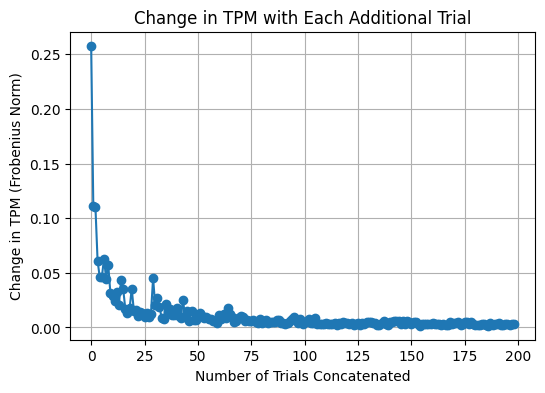

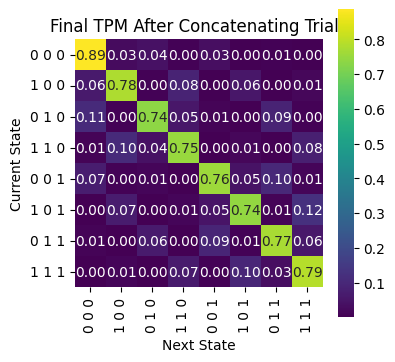

In [ ]:
# Initializing variables for the sequential concatenation and TPM computation
concatenated_trial_data = first_trial_matrix.copy()
tpm_differences = []
previous_tpm = first_trial_tpm.copy()

# Sequentially adding data from the next 19 trials and computing the TPM for each concatenation
#for i in range(1, 20):
for i in range(1, len(binarized_sdfs_selected_trials[neuron_indices[0]])):
    next_trial_data = np.array([binarized_sdfs_selected_trials[neuron_indices[0]][i],
                                binarized_sdfs_selected_trials[neuron_indices[1]][i],
                                binarized_sdfs_selected_trials[neuron_indices[2]][i]])
    concatenated_trial_data = np.hstack((concatenated_trial_data, next_trial_data))

    # Computing the TPM for the concatenated data
    current_tpm = compute_single_trial_tpm(concatenated_trial_data)

    # Calculating the difference between the current and previous TPM
    tpm_difference = np.linalg.norm(current_tpm - previous_tpm, 'fro')
    tpm_differences.append(tpm_difference)
    previous_tpm = current_tpm

# Plotting the change in TPM after each trial is added
plt.figure(figsize=(6, 4))
plt.plot(tpm_differences, marker='o', linestyle='-')
plt.title('Change in TPM with Each Additional Trial')
plt.xlabel('Number of Trials Concatenated')
plt.ylabel('Change in TPM (Frobenius Norm)')
plt.grid(True)
plt.show()

# Plotting the final TPM after concatenating 20 trials
plt.figure(figsize=(4, 4))
sns.heatmap(current_tpm, annot=True, fmt=".2f", cmap='viridis', cbar=True, square=True, xticklabels=state_labels_ordered, yticklabels=state_labels_ordered)
plt.title('Final TPM After Concatenating Trials')
plt.xlabel('Next State')
plt.ylabel('Current State')
plt.show()

Let's get PyPhi going and compute PHI values for these data

In [ ]:
tpm = pyphi.convert.sbs2sbn(current_tpm)
pyPhiInput = tpm
labels = ('A','B','C')

# Define the number of bits
num_bits = len(labels)
# Generate all possible combinations of n-bit binary numbers
possible_states = np.array(list(itertools.product([0, 1], repeat=num_bits)))

# create network
network = pyphi.Network(pyPhiInput, node_labels=labels)
node_indices = (0,1,2)
states = possible_states

# Define an array to store the phi values for each state
phi_values = np.zeros(len(states))
num_possible_states = len(possible_states)
phi_states = np.zeros((num_possible_states, 3), dtype=int)

# Define variables to store the maximum phi value and its corresponding state
max_phi = -np.inf
max_phi_state = None
# Initialize a list to store mechanisms for each state
phi_mechanisms = []

# Loop through each possible state
for i, state in enumerate(states):
    # Create the candidate subsystem
    candidate_system = pyphi.Subsystem(network, state, node_indices)

    # Compute the big phi value for the candidate subsystem
    phi_structure = pyphi.new_big_phi.phi_structure(candidate_system)
    big_phi = phi_structure.big_phi

    # Store the big phi value in the array
    phi_values[i] = big_phi
    # Store the associated state
    phi_states[i] = state
    # Extract mechanisms from distinctions and store them for the current state
    current_state_mechanisms = [distinction.mechanism for distinction in phi_structure.distinctions]
    phi_mechanisms.append(current_state_mechanisms)

    # Update the maximum big phi value and its corresponding state if necessary
    if big_phi > max_phi:
        max_phi = big_phi
        max_phi_state = state

print("Maximum big phi value:", max_phi)
print("State with maximum big phi value:", max_phi_state)

2023-12-11 21:30:27,826	INFO worker.py:1664 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


Maximum big phi value: 5.838145169076444
State with maximum big phi value: [0 0 0]


Let's assign these PHI values to our state-by-state average time series

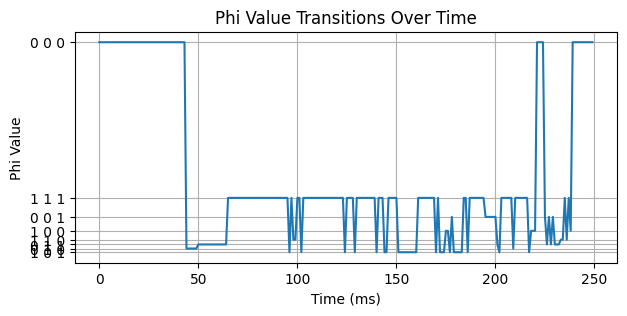

In [ ]:
# Assigning phi values to the state number time series and plotting the result

# Create a mapping from state numbers to phi values
phi_mapping_for_numbers = {i: phi_value for i, phi_value in enumerate(phi_values)}

# Converting the state numbers to phi values
phi_value_time_series_from_numbers = np.array([phi_mapping_for_numbers[state_number] for state_number in state_number_time_series])

# Plotting the phi value time series
plt.figure(figsize=(7, 3))
plt.plot(range(250), phi_value_time_series_from_numbers, label='Phi Value')

# Customizing the y-axis with phi values
plt.yticks(phi_values, [' '.join(map(str, state)) for state in state_order])

plt.xlabel('Time (ms)')
plt.ylabel('Phi Value')
plt.title('Phi Value Transitions Over Time')
plt.grid(True)
plt.show()

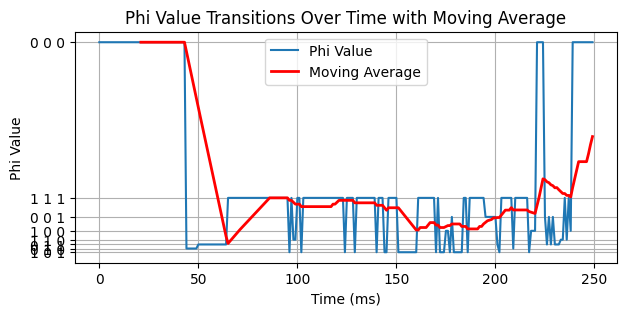

In [ ]:
# Calculating the moving average of the phi values
moving_average_window = 22  # Window size for the moving average
moving_average = np.convolve(phi_value_time_series_from_numbers, np.ones(moving_average_window)/moving_average_window, mode='valid')

# Plotting the phi value time series with the moving average
plt.figure(figsize=(7, 3))
plt.plot(range(250), phi_value_time_series_from_numbers, label='Phi Value')
plt.plot(range(moving_average_window - 1, 250), moving_average, color='red', linewidth=2, label='Moving Average')

# Customizing the y-axis with phi values
plt.yticks(phi_values, [' '.join(map(str, state)) for state in state_order])

plt.xlabel('Time (ms)')
plt.ylabel('Phi Value')
plt.title('Phi Value Transitions Over Time with Moving Average')
plt.grid(True)
plt.legend()
plt.show()

next steps: shuffle control
do this trial-by-trial, then average the traces rather than first averaging everything a